### Q1. A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?

In [ ]:
We can use Bayes' theorem to solve this problem.
Let S be the event that an employee is a smoker, 
and H be the event that an employee uses the health insurance plan. We want to find the probability of S given H, denoted by P(S|H). Bayes' theorem states:

P(S|H) = P(H|S)P(S) / P(H)

We know that P(H) = 0.7, since 70% of the employees use the plan. 

We also know that P(S) = 0.4, since 40% of the employees who use the plan are smokers.

The remaining probability, P(not S), is 0.6 (or 1 - 0.4).

To find P(H|S), we need to use the fact that 40% of the employees who use the plan are smokers.
This means that out of all the smokers, 40% use the plan. So:

P(H|S) = P(S and H) / P(S) = 0.4 / 0.4 = 1

The last step is to put everything together:

P(S|H) = P(H|S)P(S) / P(H) = 1 * 0.4 / 0.7 = 0.57 (rounded to two decimal places)

Therefore, the probability that an employee is a smoker given that he/she uses the health insurance plan is 0.57 or 57%.

### Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

1. Bernoulli Naive Bayes is a type of Naive Bayes algorithm that works on **binary data** where features are either present or absent.
2. It is used in situations where the presence or absence of a feature is more important than its frequency. 
3. For example, it can be used for text classification where each document is represented as a bag of words, and the presence or absence of a word in a document is more important than its frequency.

1. Multinomial Naive Bayes is used for categorical data where features can take on **multiple values**. 
2. It is commonly used for text classification where each document is represented as a bag of words, and the frequency of a word in a document is used as a feature.


### Q3. How does Bernoulli Naive Bayes handle missing values?

Naive Bayes can handle missing data. 

- ignore the attribute in instance where attribute is missing

- compute the likelyhood based on the observed attribute.

- As such, if a data instance has a missing value for an attribute, it can be ignored while preparing the model, and ignored when a probability is calculated for a class value.

- For text classification no missing value considered as its word occred in given doc or doen not occur.


### Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Yes.

In [1]:
import pandas as pd
import numpy as np

In [34]:
import pandas as pd 
df = pd.read_csv('C:/Data science material/Krish Naik_PW skills/ML/Naive Bayes/spambase.data', sep = ',', names=['word_freq_make',
'word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove',
'word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people',
'word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you',
'word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telne',
'word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999',
'word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting',
'word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','Output'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [36]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telne               0
word_fre

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
## Independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [39]:
X.shape

(4601, 57)

In [41]:
y.shape

(4601,)

In [42]:
y.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
X_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
2459,0.00,7.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.286,1.826,13,42
1390,0.29,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.44,0.29,...,0.00,0.050,0.066,0.000,0.083,0.050,0.000,3.075,60,326
2078,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.733,9,26
3199,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,2
3405,0.00,0.00,0.00,0.0,1.54,0.00,0.00,0.51,0.00,0.51,...,0.00,0.000,0.158,0.000,0.079,0.000,0.000,1.711,15,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.17,0.00,0.17,0.0,1.52,0.35,0.05,0.05,0.05,0.05,...,0.00,0.010,0.052,0.000,0.010,0.167,0.000,1.818,13,462
3264,0.00,0.33,0.00,0.0,0.33,0.00,0.00,0.00,0.00,0.00,...,0.33,0.000,0.088,0.000,0.000,0.000,0.000,1.870,15,116
1653,0.43,0.40,0.37,0.0,0.15,0.09,0.06,0.12,0.50,0.97,...,0.00,0.031,0.122,0.010,0.345,0.420,0.266,8.016,178,3303
2607,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.222,0.055,0.000,0.000,0.000,1.506,12,119


## BernoulliNB

In [45]:
from sklearn.naive_bayes import BernoulliNB

In [46]:
ber = BernoulliNB()

In [47]:
ber

BernoulliNB()

In [48]:
ber.fit(X_train,y_train)

BernoulliNB()

In [49]:
y_pred=ber.predict(X_test)

### accuracy_score ,classification_report and confusion_matrix

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [52]:
print(confusion_matrix(y_pred,y_test))

[[769 119]
 [ 53 440]]


In [53]:
print(accuracy_score(y_pred,y_test))

0.8754525706010138


In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       888
           1       0.79      0.89      0.84       493

    accuracy                           0.88      1381
   macro avg       0.86      0.88      0.87      1381
weighted avg       0.88      0.88      0.88      1381



### Cross Validation Bernolli

In [56]:
from sklearn.model_selection import KFold

In [57]:
cv=KFold(n_splits=10)

In [58]:
cv

KFold(n_splits=10, random_state=None, shuffle=False)

In [59]:
from sklearn.model_selection import cross_val_score

In [61]:
## these are the scores all the cross validation
scores=cross_val_score(ber,X_train,y_train,scoring='accuracy',cv=cv)

In [63]:
np.mean(scores)

0.8881987577639752

## Multinomial Naive Bayes,

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
multinomial = MultinomialNB()

In [75]:
multinomial.fit(X_train,y_train)

MultinomialNB()

In [76]:
y_pred=multinomial.predict(X_test)

## Check accuracy

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [78]:
print(confusion_matrix(y_pred,y_test))

[[699 140]
 [123 419]]


In [79]:
print(accuracy_score(y_pred,y_test))

0.8095582910934106


In [80]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       839
           1       0.75      0.77      0.76       542

    accuracy                           0.81      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.81      0.81      0.81      1381



### Cross Validation Multinomial

In [85]:
from sklearn.model_selection import KFold

In [87]:
cv=KFold(n_splits=10)

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
## these are the scores all the cross validation
scores=cross_val_score(multinomial,X_train,y_train,scoring='accuracy',cv=cv)

In [91]:
scores.mean()

0.803416149068323

## GaussianNB

In [95]:
from sklearn.naive_bayes import GaussianNB

In [96]:
gaussion = GaussianNB()

In [97]:
gaussion.fit(X_train,y_train)

GaussianNB()

In [119]:
y_pred=gaussion.predict(X_test)
print("Training accuracy : ",accuracy_score(y_test,y_pred))

Training accuracy :  0.8124547429398986


## Check ACcuracy

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [120]:
print("Confusion Matrix : ",confusion_matrix(y_pred,y_test))

Confusion Matrix :  [[597  34]
 [225 525]]


In [122]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.8124547429398986


In [102]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       631
           1       0.94      0.70      0.80       750

    accuracy                           0.81      1381
   macro avg       0.83      0.82      0.81      1381
weighted avg       0.84      0.81      0.81      1381



In [ ]:
### Cross Validation Multinomial

In [104]:
from sklearn.model_selection import KFold

In [105]:
cv=KFold(n_splits=10)

In [106]:
from sklearn.model_selection import cross_val_score

C:\Users\Sadha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 400x400 with 0 Axes>

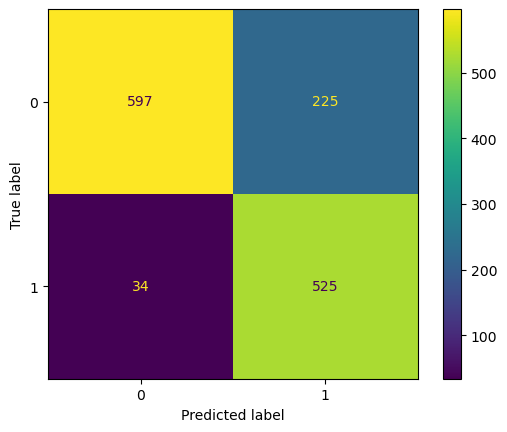

In [140]:
## these are the scores all the cross validation
scores=cross_val_score(gaussion,X_train,y_train,scoring='accuracy',cv=cv)
plt.figure(figsize=(4,4))
plot_confusion_matrix (gaussion,X_test,y_test)

In [108]:
scores.mean()

0.829192546583851

In [109]:
from sklearn.preprocessing import PowerTransformer

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gaussion, 
                     param_grid=params_NB, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [110]:
gs_NB.best_params_

{'var_smoothing': 0.657933224657568}

In [111]:
gs_NB.best_score_

0.9094880617245333

In [124]:
accuracy_test = accuracy_score(y_pred,y_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8124547429398986


In [137]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9094858797972484


In [138]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\Sadha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 400x400 with 0 Axes>

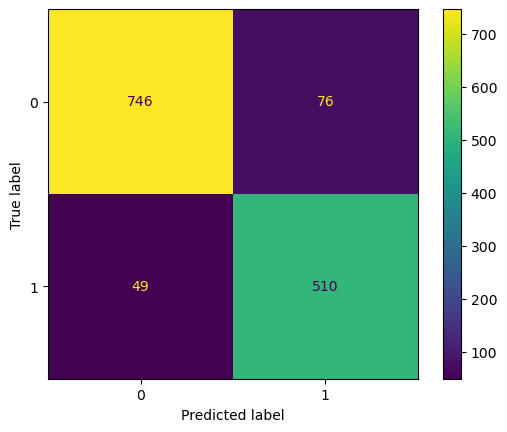

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plot_confusion_matrix (gs_NB,Data_transformed,y_test)

Discussion:
Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is
the case? Are there any limitations of Naive Bayes that you observed?

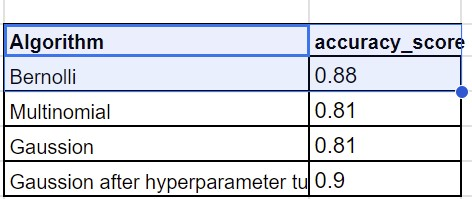

In [1]:
from IPython.display import Image
Image(filename='accuracy.jpg') 

### Limitations :

- Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.

- This algorithm faces the ‘zero-frequency problem’ where it assigns zero probability to a categorical variable whose category in the test data set wasn’t available in the training dataset. It would be best if you used a smoothing technique to overcome this issue.

- Its estimations can be wrong in some cases, so you shouldn’t take its probability outputs very seriously. 